# 2019 Sales Analysis

### Module / Library Imports

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Collecting and Merging Data

In [3]:
sales_df = pd.DataFrame()
dfs = []
path ='./Sales_Data'
files = os.listdir(path)

In [4]:
for file in files:
    df = pd.read_csv(f'{path}/{file}')
    dfs.append(df)

In [5]:
sales_df = sales_df.append(dfs)

In [6]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Saving Sales Year as CSV

In [7]:
output_path = "./Output/"
output_file = 'sales_year.csv'
sales_df.to_csv(f'{output_path}{output_file}', index=None)

### Reading Back Sales Year
*Note: This allows us to access the entire Sales Year without needing to read all the Month Sales files*

In [8]:
sales_year_df = pd.read_csv(f'{output_path}{output_file}')

In [9]:
sales_year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Question 1: What was the best month for sales? How much was earned that month?
Before we can answer this, it is impertive to santize the dataframe so that the data being transformed can be put to immediate use.

### Sanitation

#### Drop NaN

In [10]:
sales_year_df.dropna(how='all', inplace=True)

#### Drop Duplicate Header Rows

In [11]:
sales_year_df = sales_year_df.loc[sales_year_df['Order ID'].str[0] != 'O']

### Isolating Periods
To find the months (period) that had the best sales, we need to isolate them in a seperate column as well as calculate the total of the order. We can then follow this up with a groupby function to get an aggregate.

In [12]:
sales_year_df['Period'] = sales_year_df['Order Date'].str[0:2]

In [13]:
sales_year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Period
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### Transformation
The Quanity and Price Each are being read in as strings, so it is neccessary to tranform the columns into numbers.

*Note: More Sanitation Needed Before Proceeding*

In [14]:
sales_year_df[['Quantity Ordered','Price Each']] = sales_year_df[['Quantity Ordered','Price Each']].apply(pd.to_numeric)

In [15]:
sales_year_df['Total'] = sales_year_df['Quantity Ordered']*sales_year_df['Price Each']

In [16]:
sales_year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Period,Total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


### Transformation Verification

In [48]:
sales_year_df.iloc[0]['Total'] == sales_year_df.iloc[0]['Quantity Ordered'] * sales_year_df.iloc[0]['Price Each']

True

### Period Analysis Aggregate

In [60]:
period_analysis = sales_year_df[['Period', 'Quantity Ordered', 'Total']].groupby(['Period']).sum()

### Analysis Formatting

In [61]:
period_analysis['Total'] = period_analysis['Total']/pow(10,6)

In [62]:
period_analysis.rename({'Period': 'Period', 'Quantity Ordered': 'Quantity Ordered','Total': 'Total (Millions)'}, axis=1, inplace=True)

In [63]:
period_analysis

,Quantity Ordered,Total (Millions)
Period,,
01,10903,1.822257
02,13449,2.202022
03,17005,2.807100
04,20558,3.390670
05,18667,3.152607
06,15253,2.577802
07,16072,2.647776
08,13448,2.244468
09,13109,2.097560


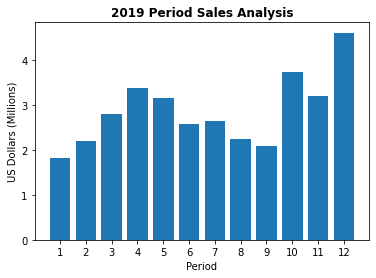

In [70]:
months = range(1,13)

plt.bar(months, period_analysis['Total (Millions)'])

plt.title("2019 Period Sales Analysis", fontdict={'weight': 'bold'})
plt.xticks(months)
plt.xlabel('Period')
plt.ylabel('US Dollars (Millions)')

plt.show()